In [2]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
import statistics
from scipy import stats

<font size="5"><b>1.</b></font> 

Rolling a sum of seven from 2 six sided dice is more probable because there are more ways to sum to seven. Getting snake eyes can be done in one way, 1's on each dice. Rolling a sum of seven can be done (1 6, 6 1, 3 4, 4 3, 5 2, 2 5) in six ways 

<font size="5"><b>2.</b></font> 

2.  A    B   sum  Probability
    | 1 | 1 | 2  | 1/36 |
    | 1 | 2 | 3  | 1/36 |
    | 2 | 1 | 3  | 1/36 |
    | 2 | 2 | 4  | 1/36 |
    | 2 | 3 | 5  | 1/36 |
    | 3 | 2 | 5  | 1/36 |
    | 3 | 3 | 6  | 1/36 |
    | 3 | 4 | 7  | 1/36 |
    | 4 | 3 | 7  | 1/36 |
    | 4 | 4 | 8  | 1/36 |
    | 4 | 5 | 9  | 1/36 |
    | 5 | 4 | 9  | 1/36 |
    | 5 | 5 | 10 | 1/36 |
    | 5 | 6 | 11 | 1/36 |
    | 6 | 5 | 11 | 1/36 |
    | 6 | 6 | 12 | 1/36 |
    
To find the probability of the sum of 2 dice, we can go through every possible sum and think about all the outcomes possible to give that sum. For example, there are two ways to get a sum of 6 (3 3, 3 3) on each dice, which gives us the probability of 2/36. These values are summarized in the table above

Using convolution operator analytically P(a+b)=P(a)*P(b)*combinations:
sum=2 = 1 1 (1 combination = 1/36)
sum=3 = 1 2,2 1 (2 combinations = 2/36)
sum=4 = 1 3, 3 1, 2 2 (3 combinations = 1/12)
sum=5 = 1 4, 4 1, 2 3, 3 2 (4 combinations = 1/9)
sum=6 = 1 5, 5 1, 2 4, 4 2, 3 3 (5 combinations = 5/36)
sum=7 = 1 6, 6 1, 5 2, 2 5, 3 4, 4 3 (6 combinations = 1/6)
sum=8 = 2 6, 6 2, 5 3, 3 5, 4 4 (5 combinations = 5/36)
sum=9 = 6 3, 3 6, 5 4, 4 5 (4 combinations = 1/9)
sum=10 = 6 4, 4 6, 5 5 (3 combinations = 1/12)
sum 11 = 6 5, 5 6 (2 combinations = 2/36)
sum=12 = 6 6 (1 combinations = 1/36)
This gives the probabilities of rolling 2 six sided dice and all their possible combinations.

In [3]:
convolved = np.convolve([1/6,1/6,1/6,1/6,1/6,1/6],[1/6,1/6,1/6,1/6,1/6,1/6])
print(convolved)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


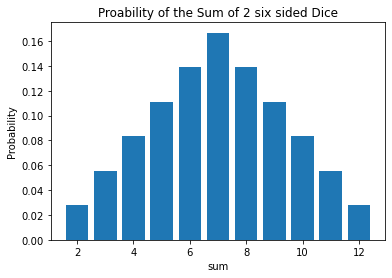

In [6]:
sum = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.title('Proability of the Sum of 2 six sided Dice')
plt.xlabel('sum')
plt.ylabel('Probability')
plt.bar(sum,convolved)
plt.show()

<font size="5"><b>3.</b></font> 

In [7]:
#mean
from IPython.display import Image
Image(filename='expec_value.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'expec_value.jpg'

We can just multiply each sum value with its probability.

In [8]:
mean = np.dot(sum,convolved)
mean 

7.0

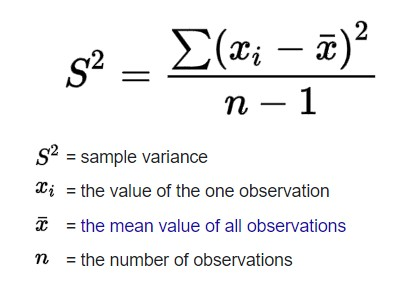

In [59]:
#variance
from IPython.display import Image
Image(filename='variance.jpg')

In [10]:
#numerator is given by 
numerator = (sum - mean)**2
#variance 
var = np.dot(numerator, convolved)
var

5.833333333333333

<font size="5"><b>4.</b></font> 

In [11]:
#convolve 9 times
probability = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
#Already convolved once in number two, need to convolve 8 more times to reach sum 
for i in range(8):
    convolved = np.convolve(convolved, probability)
convolved

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

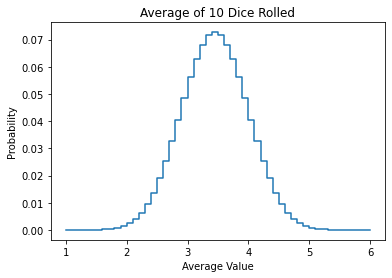

In [12]:
x = np.linspace(1,6, len(convolved))
plt.step(x, convolved)
plt.title('Average of 10 Dice Rolled')
plt.xlabel('Average Value')
plt.ylabel('Probability')
plt.show()

This is reminiscent of the gaussian distribution shape. We can see that the distribution is centered around the mean around ~3.5 and falls off quickly on either side. Now, the central limit theorm states that the more convolutions are done, the distribution gets closer and closer to the perfect gaussian shape. The more dice we roll, the more convolutions are done and the more the shape becomes a perfect normal distribution.

<font size="5"><b>5.</b></font> 

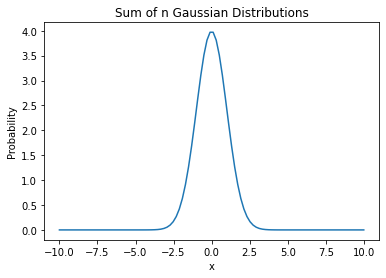

In [13]:
fig, ax = plt.subplots(1,1)
plt.title('Sum of n Gaussian Distributions')
plt.ylabel('Probability')
plt.xlabel('x')
x = np.linspace(-10,10,100)
distribution = norm.pdf(x)
def sum_distr(n, x, distribution):
    x1 = 0
    sum = 0
    for i in range(n):
        sum = distribution + distribution*i
        x1 = np.linspace(-10,10,len(sum))
        mean = norm.mean(sum[i])
        std = norm.std(sum[i])
    ax.plot(x1,sum)
    plt.show()
    
sum_distr(10,x,distribution) #10 Gaussians

In [90]:
We can see that the sum of gaussian distributions is also a gaussian distribution in itself. Above plot shows 10 gaussian being summed.

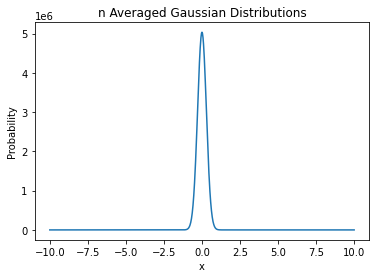

In [14]:
#average
fig, ax = plt.subplots(1,1)
plt.title('n Averaged Gaussian Distributions')
plt.xlabel('x')
plt.ylabel('Probability')
x = np.linspace (-10,10,100)
distribution = norm.pdf(x)
def avg_distr(n,x, distribution):
    x1 = 0
    convoluted = np.convolve(distribution,distribution)
    for i in range(n):
        convoluted = np.convolve(convoluted,distribution)
        x1 = np.linspace(-10,10,len(convoluted))
    ax.plot(x1,convoluted)
    plt.show()
avg_distr(10,x,distribution)

We can see that taking the average of the distribution (or convoluting it) still gives a gaussian distribution no matter how many times we convolute. In fact, the peak becomes more well defined, which makes sense. Above plot is 10 distributions being convoluted.

We can see that the gaussians that are summed do not change the standard deviation of the total distribution which means that the spread of the data remains the same. In the case of averaging, the distribution becomes thinner and thinner as we covolute more and more, which means that the spread of the data decreases dramatically when we average distributions together. This has an important implication: We can average our distributions together and get a set of data that is more likely to be a signal candidate. This is because a thinner distributions means that the data will have  a large probability.